In [338]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('df1_train.csv')
df1 = pd.read_csv('df1_test1.csv')
df1_y = pd.read_csv('df1_test1y.csv')

x_binary = df.iloc[:, 9:]
x_binary['Paid'] = df['Paid']
x_conti = df.iloc[:, 1:9]
x_conti = x_conti.drop('Paid', axis = 1)

xt_binary = df1.iloc[:, 8:]
xt_binary['Paid'] = df1['Paid']
xt_conti = df1.iloc[:, :8]
xt_conti = xt_conti.drop('Paid', axis = 1)

yr_mean = np.mean(df['life_post_consumer'])
yr_std = np.std(df['life_post_consumer'])
yt = df1_y['life_post_consumer']

y_de = df['life_post_consumer'].copy() - yr_mean
yt_de = df1_y.copy() - yr_mean

x_s = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
xt_s = (df1 - np.mean(X, axis = 0)) / np.std(X, axis = 0)


## Q1

In [339]:
df.iloc[:, :9].describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000


From the above table, we can see that there are great disparity in features' mean, and also standard deviation.

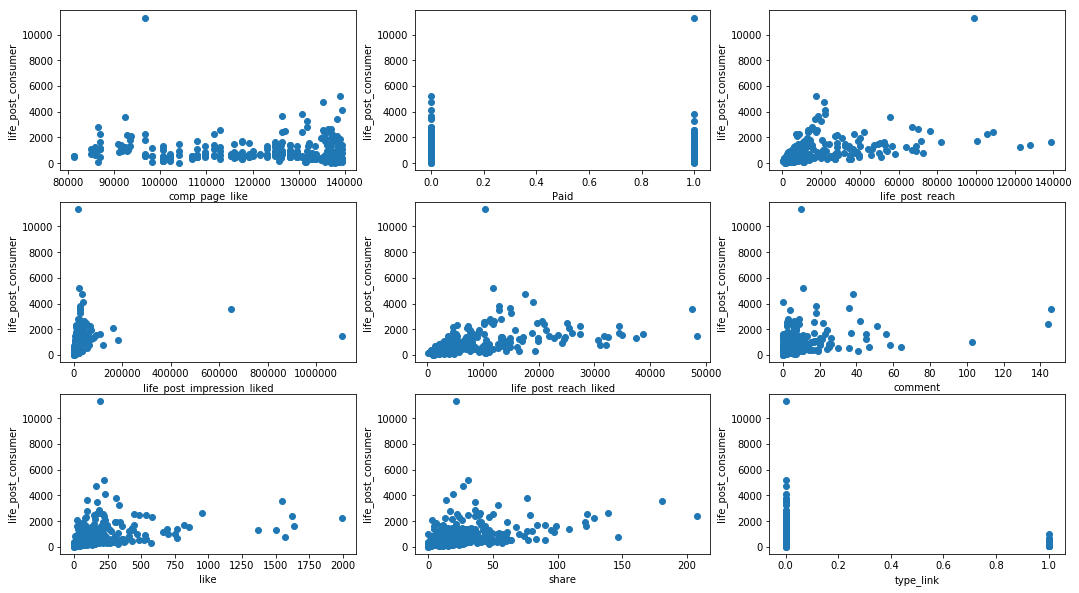

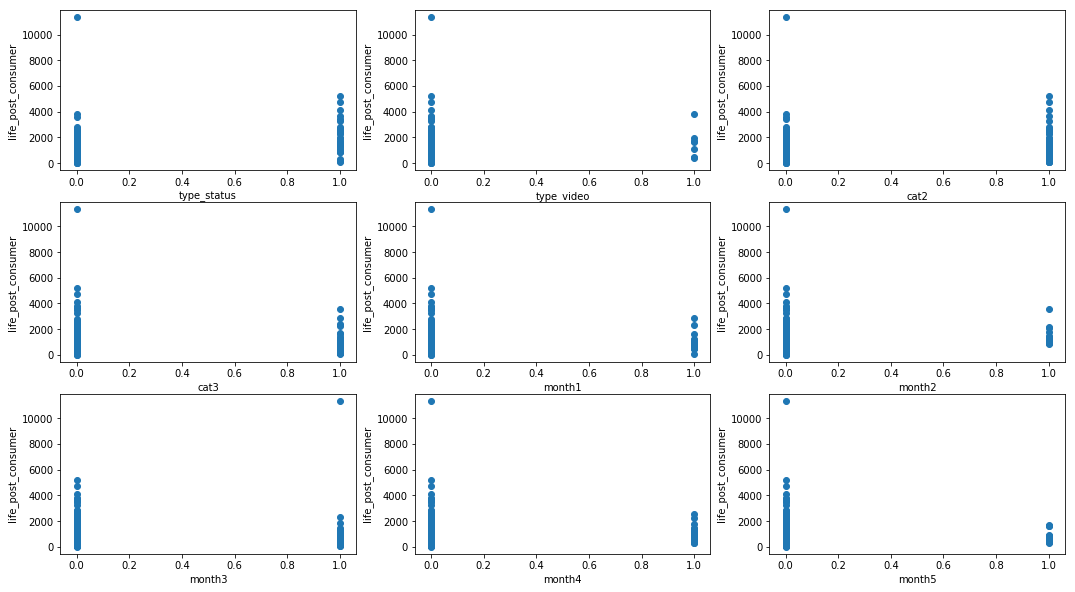

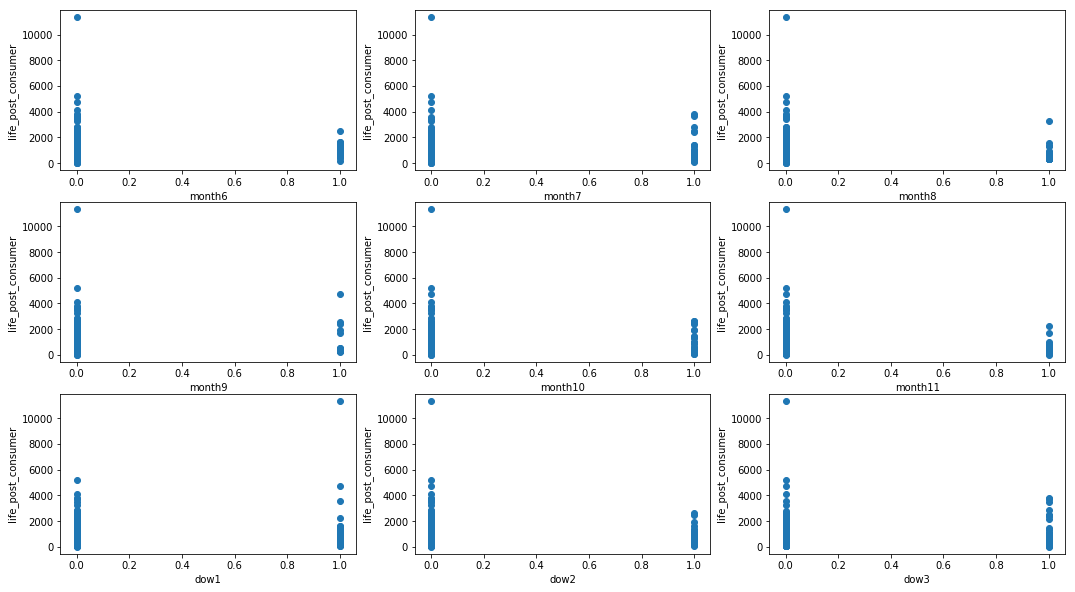

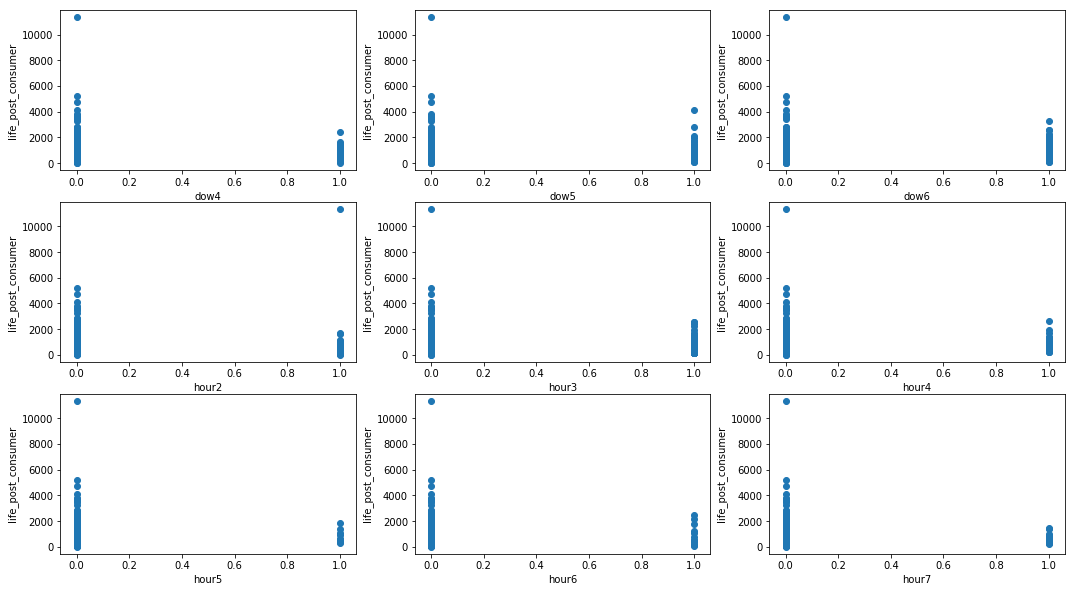

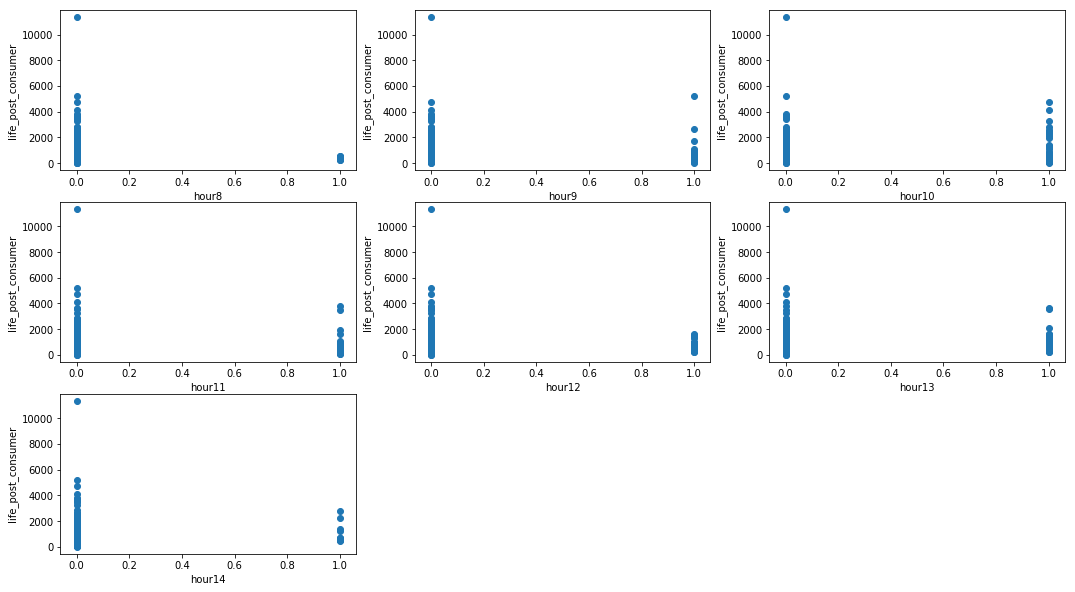

In [340]:
col = 1
for i in range(1,6):
    plt.figure(i)
    for j in range(1,10):
        img = plt.gcf()
        img.set_size_inches(18, 10)
        plt.subplot(3, 3, j)
        plt.scatter(df.iloc[:,col], df.iloc[:,0])
        plt.ylabel('life_post_consumer')
        plt.xlabel(df.columns[col])
        col += 1
        if col == len(df.columns):
            break

From the above scatter diagrams, we can see that countinuous variable are positively related to y. As to binary variable, both zero and one have many points. This tell us that binary variables may have much influence on the model.

## Q2 Case1

In [341]:
rel = []
rmse = np.sqrt((np.square(yt - yr_mean)).mean(axis=0))
rel.append(("case 1", rmse))
print("rmse is", rmse)
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", [yr_mean] * 20)

rmse is 928.8095109332162
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34]


#### initialize linear regression model and drop y

In [342]:
lm = linear_model.LinearRegression()
X = df.drop('life_post_consumer', axis = 1)

## Q3 Case2A

In [343]:
lm.fit(X , df['life_post_consumer'])
y_pred = lm.predict(df1)
rmse = np.sqrt((np.square(yt - y_pred)).mean(axis=0))
rel.append(("case 2A", rmse))
print("rmse is", rmse)
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

rmse is 692.2891271383274
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.22308101]


## Q4 Case2B

In [344]:
lm.fit(X , y_de)
y_pred = lm.predict(df1)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(yt - y_pred)).mean(axis=0))
rel.append(("case 2B", rmse))
print("rmse is", rmse)
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

rmse is 692.2891271382297
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.22308101]


## Q5 Case2C

In [345]:
lm.fit(x_s , y_de)
y_pred = lm.predict(xt_s)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(yt - y_pred)).mean(axis=0))
rel.append(("case 2C", rmse))
print("rmse is", rmse)
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

rmse is 692.2891271372008
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ]


## Q6 Case3A

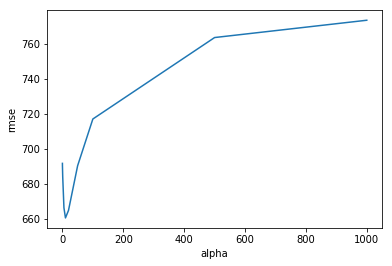

the best rmse is 660.5612900111676
rmse is 660.5612900111676
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]


In [346]:
import matplotlib.pyplot as plt

alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
Rmse = []
for i in alpha:
    rig = linear_model.Ridge(alpha = i)
    rig.fit(X, df['life_post_consumer'])
    y_pred = rig.predict(df1)
    rmse = np.sqrt((np.square(yt - y_pred)).mean(axis=0))
    Rmse.append(rmse)
plt.plot(alpha, Rmse)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print("the best rmse is", np.min(Rmse))

min_idx = Rmse.index(np.min(Rmse))
rig = linear_model.Ridge(alpha = alpha[min_idx])
rig.fit(X, df['life_post_consumer'])
y_pred = rig.predict(df1)
rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
rel.append(("case 3A", rmse))
print("rmse is", rmse)
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

## Q7 Case3B

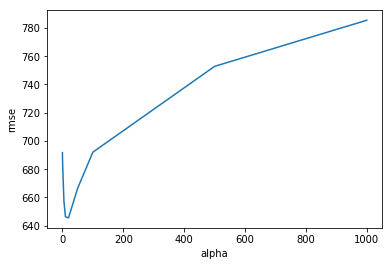

the best rmse is 645.5168123938738
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [1142.26954234  254.15701492 1834.02488944   15.7181687   599.76366292
  635.94038984  427.85644416  603.66205989  514.52378787  580.00106007
  544.34176021  477.18442084  801.54554542  557.45287238  396.27886548
  615.15152412 1474.67417376 2504.86437273 3524.85964481 3438.40343713]


In [347]:
x_cs = (x_conti - np.mean(x_conti, axis = 0)) / np.std(x_conti, axis = 0)
xt_cs = (xt_conti - np.mean(x_conti, axis = 0)) / np.std(x_conti, axis = 0)
x = [x_cs, x_binary]
Xss = pd.concat(x, axis = 1)
xt = [xt_cs, xt_binary]
Xt = pd.concat(xt, axis = 1)

Rmse_B = []
for i in alpha:
    rig = linear_model.Ridge(alpha = i)
    rig.fit(Xss, y_de)
    y_pred = rig.predict(Xt)
    y_pred = y_pred + yr_mean
    rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
    Rmse_B.append(rmse)
plt.plot(alpha, Rmse_B)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print("the best rmse is", np.min(Rmse_B))

min_idx = Rmse_B.index(np.min(Rmse_B))
rig = linear_model.Ridge(alpha = alpha[min_idx])
rig.fit(Xss, y_de)
y_pred = rig.predict(Xt)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
rel.append(("case 3B", rmse))
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

## Q8 Case3C

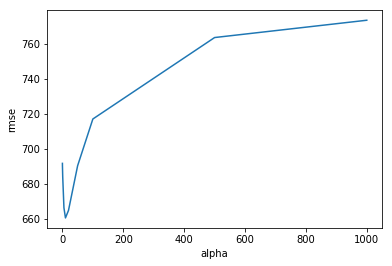

the best rmse is 660.5612900111676
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]


In [348]:
Rmse_C = []
for i in alpha:
    rig = linear_model.Ridge(alpha = i)
    rig.fit(X, y_de)
    y_pred = rig.predict(df1)
    y_pred = y_pred + yr_mean
    rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
    Rmse_C.append(rmse)
plt.plot(alpha, Rmse_C)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print("the best rmse is", np.min(Rmse_C))

min_idx = Rmse_C.index(np.min(Rmse_C))
rig = linear_model.Ridge(alpha = alpha[min_idx])
rig.fit(X, y_de)
y_pred = rig.predict(df1)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
rel.append(("case 3C", rmse))
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

## Q9 Case3D

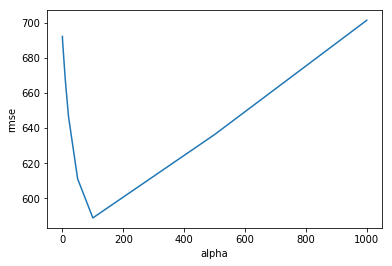

the best rmse is 588.7934657527671
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [1040.50012261  278.4650498  1997.72446427  -21.14036502  554.2152571
  602.8406419   337.52346959  599.43578526  470.29370416  500.7241404
  511.14861912  387.7435535   700.08957652  532.22280969  255.18311778
  653.3563783  1728.16919169 2775.00271095 3174.79225189 3141.85797609]


In [349]:
Rmse_D = []
for i in alpha:
    rig = linear_model.Ridge(alpha = i)
    rig.fit(x_s, y_de)
    y_pred = rig.predict(xt_s)
    y_pred = y_pred + yr_mean
    rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
    Rmse_D.append(rmse)
plt.plot(alpha, Rmse_D)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print("the best rmse is", np.min(Rmse_D))

min_idx = Rmse_D.index(np.min(Rmse_D))
rig = linear_model.Ridge(alpha = alpha[min_idx])
rig.fit(x_s, y_de)
y_pred = rig.predict(xt_s)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
rel.append(("case 3D", rmse))
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

## Q10 Case4

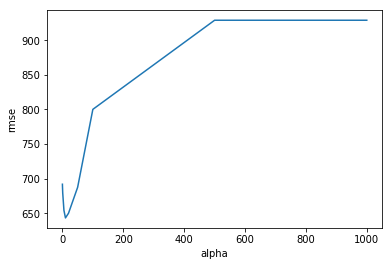

the best alpha is 10
the best rmse is 643.3852479712565
the first 20 true outcome value : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]
the first 20 predictions : 
 [1241.59734329  287.88713054 2119.91067936  -16.29956563  449.09998199
  711.14901352  398.05878568  460.15460965  645.44691002  591.43450742
  429.96484779  461.48061943  899.80951304  571.86605232  352.86376329
  548.08833114 1741.01452412 2712.0560645  3681.46936908 3645.13123499]


In [350]:
Rmse_L = []
for i in alpha:
    lso = linear_model.Lasso(alpha = i)
    lso.fit(Xss, y_de)
    y_pred = lso.predict(Xt)
    y_pred = y_pred + yr_mean
    rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
    Rmse_L.append(rmse)
plt.plot(alpha, Rmse_L)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

min_idx = Rmse_L.index(np.min(Rmse_L))

print("the best alpha is", alpha[min_idx])
print("the best rmse is", np.min(Rmse_L))

lso = linear_model.Lasso(alpha = alpha[min_idx])
lso.fit(Xss, y_de)
y_pred = lso.predict(Xt)
y_pred = y_pred + yr_mean
rmse = np.sqrt((np.square(df1_y['life_post_consumer'] - y_pred)).mean(axis=0))
rel.append(("case 4", rmse))
print("the first 20 true outcome value : \n", np.array(yt)[:20])
print("the first 20 predictions : \n", y_pred[:20])

## Q11 

In [352]:
for i, j in rel:
    print(i,":",j)

case 1 : 928.8095109332162
case 2A : 692.2891271383274
case 2B : 692.2891271382297
case 2C : 692.2891271372008
case 3A : 660.5612900111676
case 3B : 645.5168123938738
case 3C : 660.5612900111676
case 3D : 588.7934657527671
case 4 : 643.3852479712565


For case 1, the rmse is 928.8095. It is the biggest among all cases because it only use mean of y to predict.

For case 2, three of different method for preprocessing data have same result 692.2891. That is, preprocess method doesn't impact the result.

For case 3, the best rmse is 588.7934. we can infer that standatdized data helps reduce rmse. However, whether de-mean does not matter.

For case 4, the rmse is 643.3852. it has same data preprocessing method with case 3B but perform better than it. So, Lasso performs better.

Among all cases, case 3D has best rmse.